### **(9) 문자열 압축**

**제공 링크**  
https://school.programmers.co.kr/learn/courses/30/lessons/60057

**문제**

문자열에서 같은 값이 연속해서 나타나는 것을 그 문자의 개수와 반복되는 값으로 표현하여 더 짧은 문자열로 줄여서 표현하는 알고리즘  
**압축할 문자열 s가 매개변수로 주어질 때, 아래 설명한 방법으로 1개 이상 단위로 문자열을 잘라 압축하여 표현한 문자열 중 가장 짧은 것의 길이를 return 하도록 solution 함수**를 만들기

 "aabbaccc"의 경우 "2a2ba3c"(문자가 반복되지 않아 한번만 나타난 경우 1은 생략함)와 같이 표현할 수 있는데, 이러한 방식은 반복되는 문자가 적은 경우 압축률이 낮다는 단점

**예시**

"ababcdcdababcdcd"의 경우 문자를 1개 단위로 자르면 전혀 압축되지 않지만, 2개 단위로 잘라서 압축한다면 "2ab2cd2ab2cd"로 표현할 수 있습니다. 다른 방법으로 8개 단위로 잘라서 압축한다면 "2ababcdcd"로 표현할 수 있으며, 이때가 가장 짧게 압축하여 표현할 수 있는 방법

**제한사항**

* 1 ≤ s의 길이 ≤ 1,000  
* s는 알파벳 소문자

In [ ]:
#def solution(s):
#    answer = 0
#    return answer

In [1]:
s = "aabbaccc"
l_result = []
for length in range(1, len(s) // 2 + 1) :
    l_result.append(length)
    
print(l_result)

[1, 2, 3, 4]


In [2]:
s = "aabbaccc"
result = []

for length in range(1, len(s) // 2 + 1) :
    for i in range(0, len(s), length):     # 길이만큼 문자열을 자르는 부분 수정
        substr = s[i:i + length]
        result.append(substr)
    
print(result)

['a', 'a', 'b', 'b', 'a', 'c', 'c', 'c', 'aa', 'bb', 'ac', 'cc', 'aab', 'bac', 'cc', 'aabb', 'accc']


In [14]:
s = "aabbaccc"
length = 1

str_c = []                                     # 초기화
for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
    substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
    if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
        str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
    else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
        str_c.append((substr, 1))               # 새로운 튜플을 추가


print(str_c)

[('a', 2), ('b', 2), ('a', 1), ('c', 3)]


In [5]:
import time

s = input("")         # 입력 받은 문자열

start = time.time()   # 시작 시점

result = []           # 결과를 저장할 리스트

def solution(s):
    global result    # solution 함수 내에서 사용 가능한 전역 변수 result

    for length in range(1, len(s) // 2 + 1):          # 문자열 압축 단위 개수 확인
        
        str_c = []                                     # 초기화
        for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
            substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
            if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
                str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
            else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
                str_c.append((substr, 1))               # 새로운 튜플을 추가

        # 결과를 문자열로 합치기
        result_str = []

        for substr, count in str_c:                   # 튜플의 값을 문자와 숫자로 나눈다.
            if count > 1:                             # 숫자가 1보다 크면
                result_str.append(str(count) + substr) # ex) ('a', 2) 이 구조에서 2a로 
            else:
                result_str.append(substr)              # 숫자가 1보다 작다면 그대로 문자만 반환 

        result_str = ''.join(result_str)               # 하나의 문자열로 연결

        # 결과의 길이 계산 및 저장
        result_length = len(result_str)
        result.append((length, result_length))         # ex) 1로 압축 했을 때의 결과 길이, ... length로 압훅 했을 때 결과 길이

    min_len = min(result, key=lambda x: x[1])[1]      # (문자열 길이)를 기준으로 최소값을 찾기
    return min_len                                    # 결과값을 반환

# solution 함수 호출
min_len = solution(s)

end = time.time()                                      # 종료 시점
print(min_len)
print("Time:", end - start, "초")                 

aabbaccc
7
Time: 0.0009624958038330078 초


In [6]:
import time

s = input("")         # 입력 받은 문자열

start = time.time()   # 시작 시점

result = []           # 결과를 저장할 리스트

def solution(s):
    global result    # solution 함수 내에서 사용 가능한 전역 변수 result

    for length in range(1, len(s) // 2 + 1):          # 문자열 압축 단위 개수 확인
        
        str_c = []                                     # 초기화
        for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
            substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
            if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
                str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
            else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
                str_c.append((substr, 1))               # 새로운 튜플을 추가

        # 결과를 문자열로 합치기
        result_str = []

        for substr, count in str_c:                   # 튜플의 값을 문자와 숫자로 나눈다.
            if count > 1:                             # 숫자가 1보다 크면
                result_str.append(str(count) + substr) # ex) ('a', 2) 이 구조에서 2a로 
            else:
                result_str.append(substr)              # 숫자가 1보다 작다면 그대로 문자만 반환 

        result_str = ''.join(result_str)               # 하나의 문자열로 연결

        # 결과의 길이 계산 및 저장
        result_length = len(result_str)
        result.append((length, result_length))         # ex) 1로 압축 했을 때의 결과 길이, ... length로 압훅 했을 때 결과 길이

    min_len = min(result, key=lambda x: x[1])[1]      # (문자열 길이)를 기준으로 최소값을 찾기
    return min_len                                    # 결과값을 반환

# solution 함수 호출
min_len = solution(s)

end = time.time()                                      # 종료 시점
print(min_len)
print("Time:", end - start, "초")                 

ababcdcdababcdcd
9
Time: 0.0012791156768798828 초


In [7]:
import time

s = input("")         # 입력 받은 문자열

start = time.time()   # 시작 시점

result = []           # 결과를 저장할 리스트

def solution(s):
    global result    # solution 함수 내에서 사용 가능한 전역 변수 result

    for length in range(1, len(s) // 2 + 1):          # 문자열 압축 단위 개수 확인
        
        str_c = []                                     # 초기화
        for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
            substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
            if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
                str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
            else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
                str_c.append((substr, 1))               # 새로운 튜플을 추가

        # 결과를 문자열로 합치기
        result_str = []

        for substr, count in str_c:                   # 튜플의 값을 문자와 숫자로 나눈다.
            if count > 1:                             # 숫자가 1보다 크면
                result_str.append(str(count) + substr) # ex) ('a', 2) 이 구조에서 2a로 
            else:
                result_str.append(substr)              # 숫자가 1보다 작다면 그대로 문자만 반환 

        result_str = ''.join(result_str)               # 하나의 문자열로 연결

        # 결과의 길이 계산 및 저장
        result_length = len(result_str)
        result.append((length, result_length))         # ex) 1로 압축 했을 때의 결과 길이, ... length로 압훅 했을 때 결과 길이

    min_len = min(result, key=lambda x: x[1])[1]      # (문자열 길이)를 기준으로 최소값을 찾기
    return min_len                                    # 결과값을 반환

# solution 함수 호출
min_len = solution(s)

end = time.time()                                      # 종료 시점
print(min_len)
print("Time:", end - start, "초")                 

abcabcdede
8
Time: 0.0 초


In [8]:
import time

s = input("")         # 입력 받은 문자열

start = time.time()   # 시작 시점

result = []           # 결과를 저장할 리스트

def solution(s):
    global result    # solution 함수 내에서 사용 가능한 전역 변수 result

    for length in range(1, len(s) // 2 + 1):          # 문자열 압축 단위 개수 확인
        
        str_c = []                                     # 초기화
        for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
            substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
            if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
                str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
            else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
                str_c.append((substr, 1))               # 새로운 튜플을 추가

        # 결과를 문자열로 합치기
        result_str = []

        for substr, count in str_c:                   # 튜플의 값을 문자와 숫자로 나눈다.
            if count > 1:                             # 숫자가 1보다 크면
                result_str.append(str(count) + substr) # ex) ('a', 2) 이 구조에서 2a로 
            else:
                result_str.append(substr)              # 숫자가 1보다 작다면 그대로 문자만 반환 

        result_str = ''.join(result_str)               # 하나의 문자열로 연결

        # 결과의 길이 계산 및 저장
        result_length = len(result_str)
        result.append((length, result_length))         # ex) 1로 압축 했을 때의 결과 길이, ... length로 압훅 했을 때 결과 길이

    min_len = min(result, key=lambda x: x[1])[1]      # (문자열 길이)를 기준으로 최소값을 찾기
    return min_len                                    # 결과값을 반환

# solution 함수 호출
min_len = solution(s)

end = time.time()                                      # 종료 시점
print(min_len)
print("Time:", end - start, "초")                 

abcabcabcabcdededededede
14
Time: 0.0010361671447753906 초


In [9]:
import time

s = input("")         # 입력 받은 문자열

start = time.time()   # 시작 시점

result = []           # 결과를 저장할 리스트

def solution(s):
    global result    # solution 함수 내에서 사용 가능한 전역 변수 result

    for length in range(1, len(s) // 2 + 1):          # 문자열 압축 단위 개수 확인
        
        str_c = []                                     # 초기화
        for i in range(0, len(s), length):             # 문자열을 최대 압축 단위만큼 쪼개기
            substr = s[i:i + length]                   # 범위만큼 쪼갠 문자열 substr 변수에 저장
  
            if str_c and str_c[-1][0] == substr:      # 직전에 저장한 문자열과 현재 문자열이 같다면   
                str_c[-1] = (substr, str_c[-1][1] + 1) # 튜플의 원소의 값 + 1 증가
            else:                                      # 같지 않다면 (처음은 초기화 상태라 else 부터 시작)
                str_c.append((substr, 1))               # 새로운 튜플을 추가

        # 결과를 문자열로 합치기
        result_str = []

        for substr, count in str_c:                   # 튜플의 값을 문자와 숫자로 나눈다.
            if count > 1:                             # 숫자가 1보다 크면
                result_str.append(str(count) + substr) # ex) ('a', 2) 이 구조에서 2a로 
            else:
                result_str.append(substr)              # 숫자가 1보다 작다면 그대로 문자만 반환 

        result_str = ''.join(result_str)               # 하나의 문자열로 연결

        # 결과의 길이 계산 및 저장
        result_length = len(result_str)
        result.append((length, result_length))         # ex) 1로 압축 했을 때의 결과 길이, ... length로 압훅 했을 때 결과 길이

    min_len = min(result, key=lambda x: x[1])[1]      # (문자열 길이)를 기준으로 최소값을 찾기
    return min_len                                    # 결과값을 반환

# solution 함수 호출
min_len = solution(s)

end = time.time()                                      # 종료 시점
print(min_len)
print("Time:", end - start, "초")                 

xababcdcdababcdcd
17
Time: 0.0 초


### 힘들었다.. 테스트 성공..

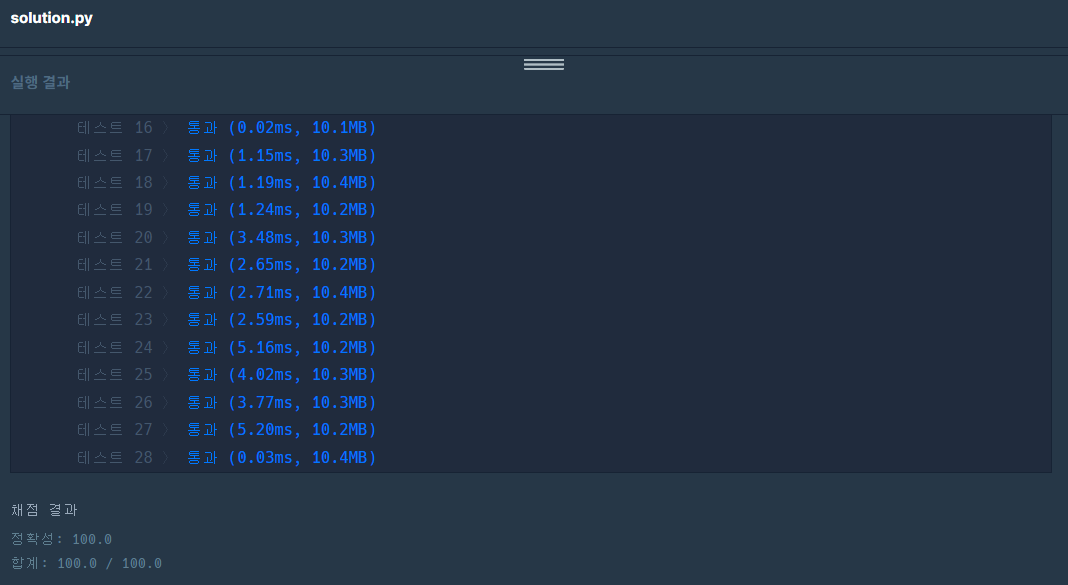